In [4]:
#Importar librerias que vamos a usar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
#Leer datos
datos=pd.read_csv("Base_HeyBanco.csv")
datos

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet
0,01/01/2023,NaN,"Resuelto, muchísimas gracias , excelente servi..."
1,02/01/2023,NaN,"Muchas gracias, espero su dm"
2,02/01/2023,NaN,Muchas gracias!
3,02/01/2023,NaN,Algo similar me paso. Quería renovar mi token ...
4,02/01/2023,NaN,Yeeeei! a través de mi cuenta en acabo de cont...
...,...,...,...
790,21/04/2024,15:21:43,"Ahora confirmo, gracias estimado"
791,23/04/2024,22:52:05,😔 de acuerdo!! Muchas gracias.
792,23/04/2024,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara..."
793,25/04/2024,00:51:24,"una duda, con quién tengo que ver si tengo pro..."


In [7]:
#Convertir fechas a dias de semana
from datetime import datetime

datos_c = datos.copy()

for i in range(len(datos_c)):
  fecha =  datos_c.iloc[i]["date"] # Formato: año-mes-día
  fecha_objeto = datetime.strptime(fecha, '%d/%m/%Y')
  dia_semana = fecha_objeto.strftime('%A')
  datos_c.at[i,"Dia_Semana"]=dia_semana

In [8]:
#Quitamos las filas que no tengan el tiempo
datos_L=datos.dropna(subset=["time"])
datos_L = datos_L.copy()
datos_L = datos_L.reset_index(drop=True)

horas=["01:00:00","02:00:00","03:00:00","04:00:00","05:00:00","06:00:00","07:00:00","08:00:00",
       "09:00:00","10:00:00","11:00:00","12:00:00","13:00:00","14:00:00","15:00:00","16:00:00",
       "17:00:00","18:00:00","19:00:00","20:00:00","21:00:00","22:00:00","23:00:00"]

#Calculamos dentro de que rango de horas está cada comentario, siendo el resultado el limite superior
for i in range(len(datos_L)):
  horita=datos_L.at[i,"time"]
  for j in range(len(horas)):
    if(horita<horas[j]):
      datos_L.at[i,"Grupo_Hora"]=j+1
      break
    elif(horita>horas[j] and j==22):
      datos_L.at[i,"Grupo_Hora"]=24

datos_L

,date,time,tweet,Grupo_Hora
0,12/06/2023,16:52:11,"Gracias, estoy al pendiente de la información.",17.0
1,13/06/2023,20:36:26,Yo fui muy feliz por muchos años con la Santan...,21.0
2,15/06/2023,22:51:17,Hola. En mi caso me comuniqué al 81 4392 2626 ...,23.0
3,15/06/2023,18:35:12,Más fácil que Now saque sus tarjetas de crédito,19.0
4,16/06/2023,19:41:04,"Perfecto, iré a un punto Hey. Gracias, bebé LOL",20.0
...,...,...,...,...
414,21/04/2024,15:21:43,"Ahora confirmo, gracias estimado",16.0
415,23/04/2024,22:52:05,😔 de acuerdo!! Muchas gracias.,23.0
416,23/04/2024,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...",22.0
417,25/04/2024,00:51:24,"una duda, con quién tengo que ver si tengo pro...",1.0


In [9]:
#Imputamos los valores en caso de tener valores sin la hora, con una imputación discreta según la probabilidad
quitados=len(datos)-len(datos_L)
valores_hora = datos_L["Grupo_Hora"].to_numpy()
valores_unicos, counts = np.unique(valores_hora, return_counts=True)
porcentaje = {valor: count / len(valores_hora) for valor, count in zip(valores_unicos, counts)}

valores = list(porcentaje.keys())
probabilidades = list(porcentaje.values())

VI = np.random.choice(valores, p=probabilidades,size=quitados)

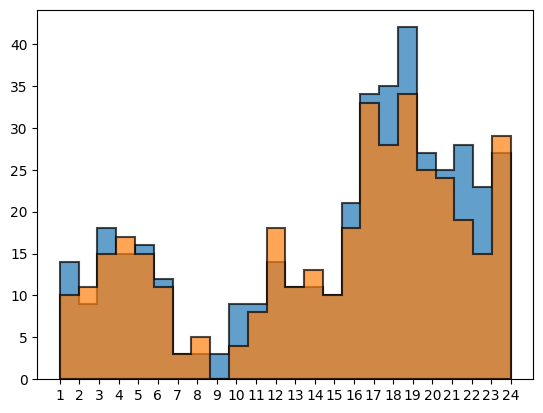

In [10]:
#Graficamos los grupos de horas para ver como se distribuyen, tambien de los datos imputados
escala= np.arange(1,25,1);
plt.hist(datos_L["Grupo_Hora"],bins=24,edgecolor='black', alpha=0.7, linewidth=1.5, histtype='stepfilled')
plt.hist(VI,bins=24,edgecolor='black', alpha=0.7, linewidth=1.5, histtype='stepfilled')
plt.xticks(escala);
plt.show()

In [11]:
#Juntamos los grupos de hora y los guardamos en nuestros datos
GH2 = datos_L["Grupo_Hora"].to_numpy()
GHT = np.concatenate((VI, GH2))
datos_c["Grupo_Hora"]=GHT

datos_c

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,date,time,tweet,Dia_Semana,Grupo_Hora
0,01/01/2023,NaN,"Resuelto, muchísimas gracias , excelente servi...",Sunday,14.0
1,02/01/2023,NaN,"Muchas gracias, espero su dm",Monday,19.0
2,02/01/2023,NaN,Muchas gracias!,Monday,16.0
3,02/01/2023,NaN,Algo similar me paso. Quería renovar mi token ...,Monday,2.0
4,02/01/2023,NaN,Yeeeei! a través de mi cuenta en acabo de cont...,Monday,11.0
...,...,...,...,...,...
790,21/04/2024,15:21:43,"Ahora confirmo, gracias estimado",Sunday,16.0
791,23/04/2024,22:52:05,😔 de acuerdo!! Muchas gracias.,Tuesday,23.0
792,23/04/2024,21:30:12,"Tío cuando me van a graduar, tengo la TDC gara...",Tuesday,22.0
793,25/04/2024,00:51:24,"una duda, con quién tengo que ver si tengo pro...",Thursday,1.0


In [12]:
#Un mapeo para sustituir los días de la semana por valores enteros
mapa_dias ={
    'Monday':1,
    'Tuesday':2,
    'Wednesday':3,
    'Thursday':4,
    'Friday':5,
    'Saturday':6,
    'Sunday':7
}

datos_c['Dia_Semana'] = datos_c['Dia_Semana'].replace(mapa_dias)

In [13]:
#Creacion de Matriz para ver que tantos comentarios hay según el día de la semana y la hora
Matriz_Actividad = np.zeros((7,24))

for i in range(len(datos_c)):
  fila=int((datos_c.iloc[i]["Dia_Semana"])-1)
  columna=int((datos_c.iloc[i]["Grupo_Hora"])-1)
  Matriz_Actividad[fila][columna]=(Matriz_Actividad[fila][columna])+1


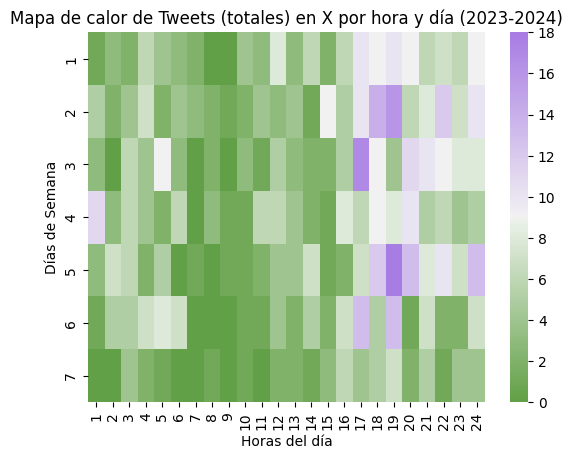

In [15]:
#Mapa de calor para ver el comportamiento de que días y a que hora hay mas comentarios
cmap = sns.diverging_palette(120, 280, s=75, l=60, n=9, as_cmap=True)
sns.heatmap(Matriz_Actividad,cmap=cmap)
x=range(1,25,1)
y=range(1,8,1)
plt.gca().set_xticklabels(x)
plt.gca().set_yticklabels(y)
plt.xlabel("Horas del día")
plt.ylabel("Días de Semana")
plt.title("Mapa de calor de Tweets (totales) en X por hora y día (2023-2024)")
plt.show()

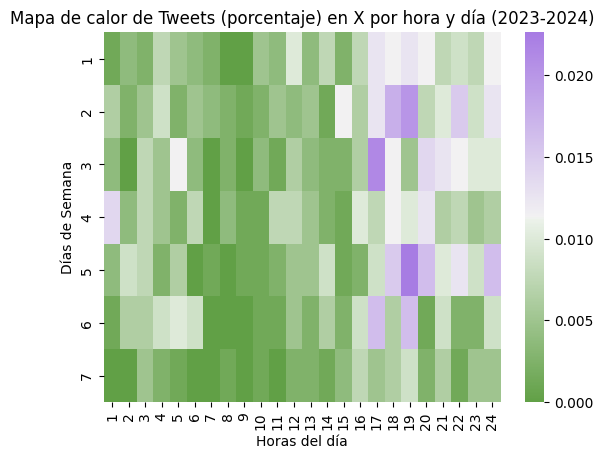

In [16]:
#Matriz de calor para la actividad de los comentarios basada en el porcentaje
matriz_actividad_porcentaje = np.array(Matriz_Actividad)
suma_total = np.sum(matriz_actividad_porcentaje)
matriz_actividad_porcentaje=matriz_actividad_porcentaje/suma_total

cmap = sns.diverging_palette(120, 280, s=75, l=60, n=9, as_cmap=True)
sns.heatmap(matriz_actividad_porcentaje,cmap=cmap)
x=range(1,25,1)
y=range(1,8,1)
plt.gca().set_xticklabels(x)
plt.gca().set_yticklabels(y)
plt.xlabel("Horas del día")
plt.ylabel("Días de Semana")
plt.title("Mapa de calor de Tweets (porcentaje) en X por hora y día (2023-2024)")
plt.show()

In [103]:
#Grafico 3D para ver de otra forma el mapa de calor de los comentarios totales
import plotly.express as px

x = np.tile(np.arange(1, 25), 7)
y = np.repeat(np.arange(1, 8), 24)
z = Matriz_Actividad.flatten()

fig = px.scatter_3d(x=x, y=y, z=z,color=z)
fig.show()